# Used cars database

### I used the used car data set because it had a variety of categorical and numerical data and allows you to explore different ways of dealing with missing data, the goal is to predict a car's price.

## Import Libraries and Dataset

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
data = pd.read_csv("Used Cars.csv", encoding="ISO-8859-1",nrows=3000)

In [20]:
data.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
2885,2016-03-14 13:25:25,A4_1.9_TDI_S_line!_131PS_Schwartz,privat,Angebot,2500,test,kombi,2003,manuell,131,a4,150000,5,diesel,audi,nein,2016-03-14 00:00:00,0,63225,2016-03-14 14:06:55
238,2016-03-12 08:51:00,Suzuki_LJ_80_fuer_Bastler,privat,Angebot,1000,control,suv,1982,manuell,41,andere,150000,11,benzin,suzuki,NaN,2016-03-12 00:00:00,0,56337,2016-03-13 00:45:46
2807,2016-03-21 13:51:16,BMW_X3_xDrive30d_Aut.,privat,Angebot,36500,test,suv,2011,automatik,258,x_reihe,70000,11,diesel,bmw,nein,2016-03-21 00:00:00,0,71686,2016-04-06 09:46:32
1879,2016-04-01 23:55:15,Opel_Meriva_1.6_KLIMA_SERVO,privat,Angebot,1890,control,NaN,2017,manuell,86,meriva,125000,9,benzin,opel,NaN,2016-04-01 00:00:00,0,45772,2016-04-06 05:16:23
925,2016-03-15 22:49:38,Ford_Fiesta__top_fuer_Anfaenger_oder_Familie_,privat,Angebot,1199,control,kleinwagen,2000,manuell,60,fiesta,125000,0,benzin,ford,nein,2016-03-15 00:00:00,0,28199,2016-03-20 23:44:46
2755,2016-03-31 19:41:11,VW_Polo_1_6,privat,Angebot,350,control,kleinwagen,1997,manuell,0,polo,150000,7,NaN,volkswagen,ja,2016-03-31 00:00:00,0,47259,2016-04-06 13:45:28
428,2016-03-29 18:45:21,BMW_530D_E39,privat,Angebot,3400,control,limousine,2002,automatik,193,5er,150000,12,diesel,bmw,NaN,2016-03-29 00:00:00,0,24143,2016-04-06 04:17:16
56,2016-03-21 01:59:07,BMW_435i_Sport_coupe,privat,Angebot,39600,test,coupe,2014,automatik,306,andere,30000,7,benzin,bmw,nein,2016-03-21 00:00:00,0,10435,2016-04-03 23:16:31
1350,2016-03-21 20:49:17,Ford_Ka_Futura_1_Hand_Klima_Kein_Rost_Alufelge...,privat,Angebot,1000,test,kleinwagen,2000,manuell,60,ka,60000,6,benzin,ford,nein,2016-03-21 00:00:00,0,63329,2016-03-22 23:37:03
112,2016-03-22 17:44:26,530d_XDRIVE_235_PS,privat,Angebot,7300,control,limousine,2009,automatik,235,5er,100000,3,diesel,bmw,nein,2016-03-22 00:00:00,0,83022,2016-03-22 17:44:26


## Informations about the dataset

In [21]:
data.shape

(3000, 20)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
dateCrawled            3000 non-null object
name                   3000 non-null object
seller                 3000 non-null object
offerType              3000 non-null object
price                  3000 non-null int64
abtest                 3000 non-null object
vehicleType            2675 non-null object
yearOfRegistration     3000 non-null int64
gearbox                2841 non-null object
powerPS                3000 non-null int64
model                  2850 non-null object
kilometer              3000 non-null int64
monthOfRegistration    3000 non-null int64
fuelType               2715 non-null object
brand                  3000 non-null object
notRepairedDamage      2405 non-null object
dateCreated            3000 non-null object
nrOfPictures           3000 non-null int64
postalCode             3000 non-null int64
lastSeen               3000 non-null object
dtypes: int64(7), ob

In [23]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.000000
mean,5889.077000,2003.229667,113.406000,125646.666667,5.892667,0.0,51135.041667
std,13106.442948,18.034301,81.147204,39886.657803,3.733246,0.0,25861.489861
min,0.000000,1111.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1200.000000,1999.000000,73.750000,125000.000000,3.000000,0.0,30912.000000
50%,2999.000000,2004.000000,105.000000,150000.000000,6.000000,0.0,50677.500000
75%,7242.500000,2008.000000,150.000000,150000.000000,9.000000,0.0,71364.000000
max,579000.000000,2018.000000,1799.000000,150000.000000,12.000000,0.0,99974.000000


# Cleaning data

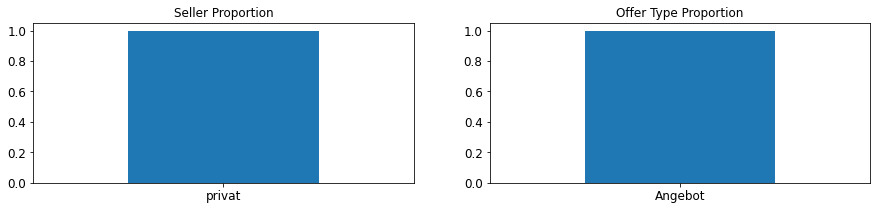

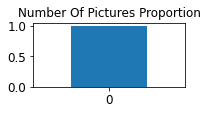

In [24]:
plt.subplots(figsize=(15,10))
plt.subplot(321)
data.seller.value_counts(100).plot(kind='bar', title="Seller Proportion", fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.subplot(322)
data.offerType.value_counts(100).plot(kind='bar', title='Offer Type Proportion', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

plt.subplot(326)
data.nrOfPictures.value_counts(100).plot(kind='bar', title='Number Of Pictures Proportion', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

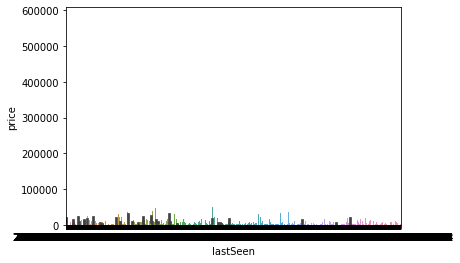

In [25]:
sns.barplot(x = 'lastSeen', y = 'price', data = data)


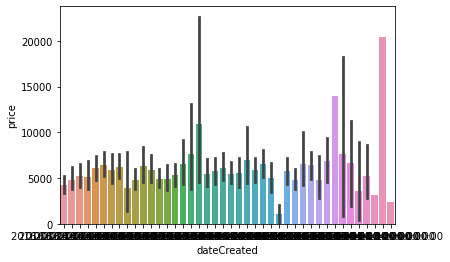

In [26]:
sns.barplot(x = 'dateCreated', y = 'price', data = data)

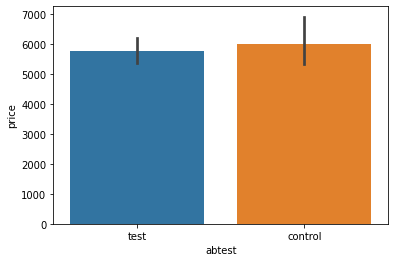

In [27]:
sns.barplot(x = 'abtest', y = 'price', data = data)

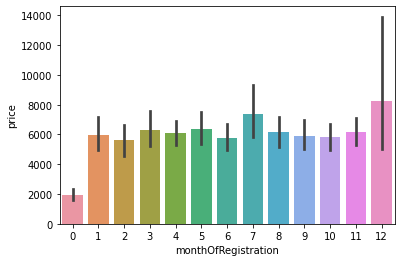

In [28]:
sns.barplot(x = 'monthOfRegistration', y = 'price', data = data)

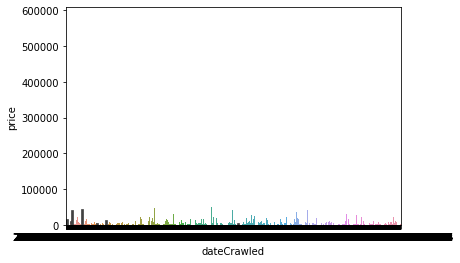

In [29]:
sns.barplot(x = 'dateCrawled', y = 'price', data = data)

#### The features seller, offerType and nrOfPictures are very sparse  representing a single category therefore they will have no effect on model performance so we drop these features. Moreover abtest variable does not provide any meaningful information to predict the price of the vehicle. We also remove dateCrawled, dateCreated and lastSeen features which are less important for our problem to predict price.

In [30]:
data = data.drop(['seller','offerType','abtest','nrOfPictures','dateCrawled', 'dateCreated', 'lastSeen', 'postalCode'], axis=1)
data1 = data.drop(['monthOfRegistration'], axis=1)

### Removing the duplicates

In [31]:
df1 = data1.drop_duplicates(['name','price','vehicleType','yearOfRegistration','gearbox','powerPS','model','kilometer','fuelType','notRepairedDamage'])

### Removing the outliers

In [32]:
df= df1[(df1.yearOfRegistration <= 2016) & (df1.yearOfRegistration >= 1950) & (df1.price >= 50) & (df1.price <= 50000) & (df1.powerPS >= 5) & (df1.powerPS <= 400)]

## Data Vizualization to help build the model(Preprocessing)

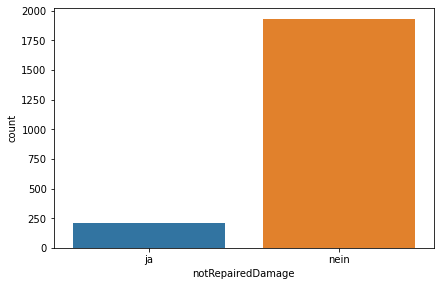

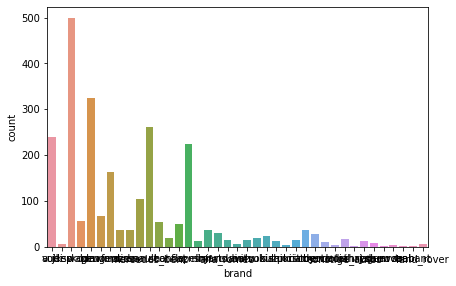

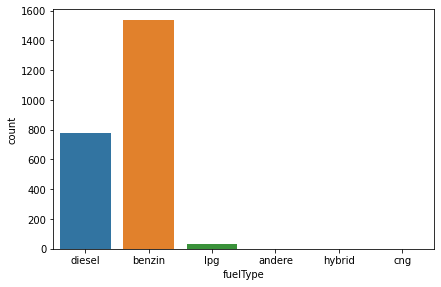

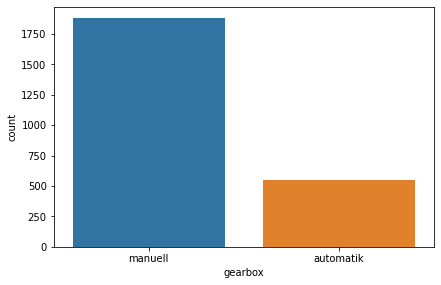

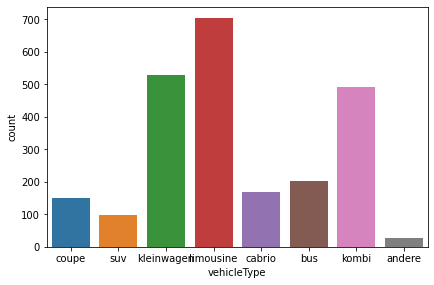

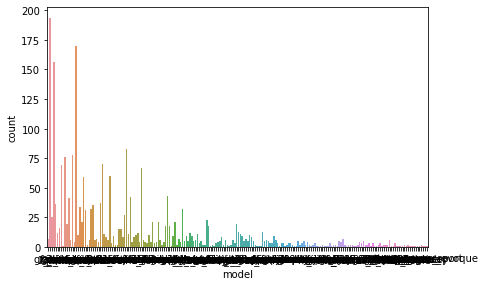

In [33]:
# Data Viz of the categorical data
plt.subplots(figsize=(15,15))
plt.subplot(322)
sns.countplot(x='notRepairedDamage', data=df)

plt.subplots(figsize=(15,15))
plt.subplot(322)
sns.countplot(x='brand', data=df)

plt.subplots(figsize=(15,15))
plt.subplot(322)
sns.countplot(x='fuelType', data=df)

plt.subplots(figsize=(15,15))
plt.subplot(322)
sns.countplot(x='gearbox', data=df)

plt.subplots(figsize=(15,15))
plt.subplot(322)
sns.countplot(x='vehicleType', data=df)

plt.subplots(figsize=(15,15))
plt.subplot(322)
sns.countplot(x='model', data=df)

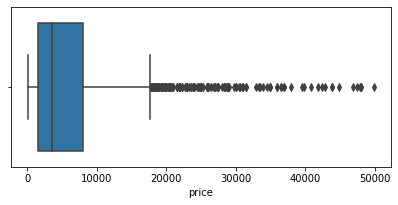

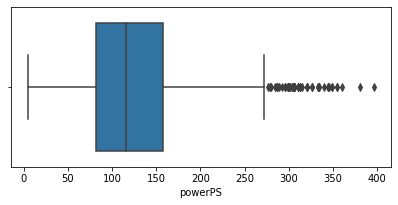

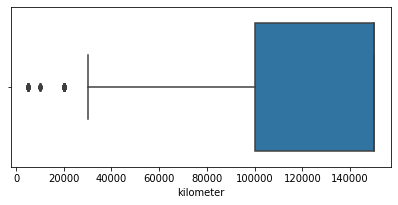

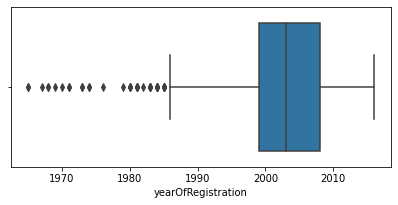

In [34]:
# Data Viz of the numerical data
plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.boxplot(df.price)

plt.subplots(figsize=(15,10))
plt.subplot(324)
sns.boxplot(df.powerPS)

plt.subplots(figsize=(15,10))
plt.subplot(326)
sns.boxplot(df.kilometer)

plt.subplots(figsize=(15,10))
plt.subplot(326)
sns.boxplot(df.yearOfRegistration)

### Data viz of the corr between the features and the target


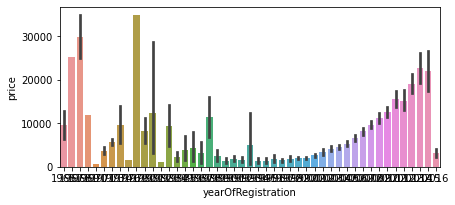

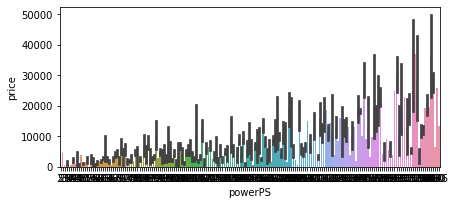

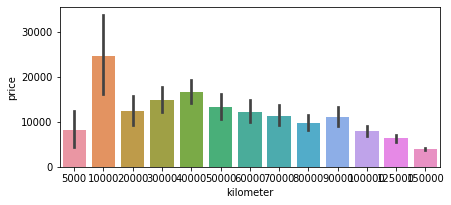

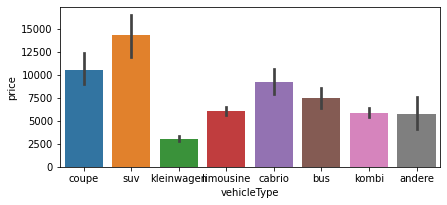

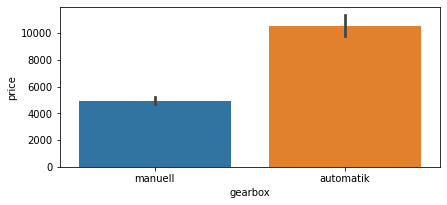

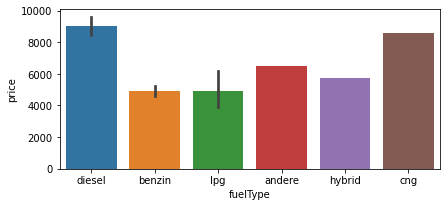

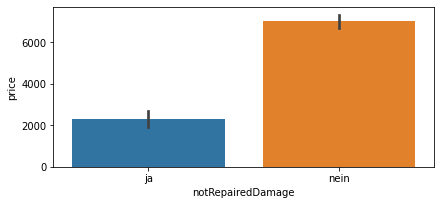

In [35]:
plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'yearOfRegistration', y = 'price', data = df)

plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'powerPS', y = 'price', data = df)

plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'kilometer', y = 'price', data = df)

plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'vehicleType', y = 'price', data = df)

plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'gearbox', y = 'price', data = df)

plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'fuelType', y = 'price', data = df)

plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'notRepairedDamage', y = 'price', data = df)

### Correlation

In [36]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer
price,1.000000,0.467205,0.566092,-0.479364
yearOfRegistration,0.467205,1.000000,0.155394,-0.360817
powerPS,0.566092,0.155394,1.000000,0.015507
kilometer,-0.479364,-0.360817,0.015507,1.000000


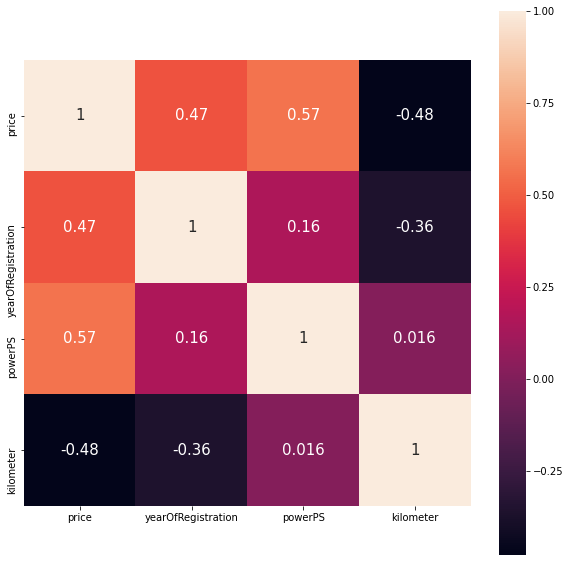

In [37]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, square=True, annot_kws={'fontsize':15})
plt.show()

### Filling missing values and applying label encoder

In [38]:
df.isna().sum()

name                    0
price                   0
vehicleType            95
yearOfRegistration      0
gearbox                42
powerPS                 0
model                  81
kilometer               0
fuelType              123
brand                   0
notRepairedDamage     333
dtype: int64

In [39]:
print(df.model.value_counts())

golf           193
andere         170
3er            156
a4              83
5er             78
              ... 
range_rover      1
phaeton          1
q3               1
300c             1
6er              1
Name: model, Length: 204, dtype: int64


In [40]:
print(df.vehicleType.value_counts())

limousine     703
kleinwagen    530
kombi         492
bus           204
cabrio        168
coupe         150
suv            99
andere         27
Name: vehicleType, dtype: int64


In [41]:
print(df.gearbox.value_counts())

manuell      1878
automatik     548
Name: gearbox, dtype: int64


In [42]:
print(df.fuelType.value_counts())

benzin    1534
diesel     779
lpg         29
cng          1
hybrid       1
andere       1
Name: fuelType, dtype: int64


In [43]:
print(df.notRepairedDamage.value_counts())

nein    1927
ja       208
Name: notRepairedDamage, dtype: int64


In [44]:
df['notRepairedDamage']=df['notRepairedDamage'].map({'ja': 1,'nein': 2})
df['fuelType']=df['fuelType'].map({'benzin': 1,'lpg': 2,'hybrid': 3,'andere': 4,'cng':5,'diesel':6})
df['gearbox']=df['gearbox'].map({'manuell': 1,'automatik': 2})
df['vehicleType']=df['vehicleType'].map({'kleinwagen': 1,'kombi': 2,'andere': 3,'limousine': 4,'bus':5,'cabrio':6,'coupe':7,'suv':8})

In [45]:
df.model = df['model'].fillna(method='ffill')
df['gearbox']=df['gearbox'].fillna(df['gearbox'].median())
df['notRepairedDamage']=df['notRepairedDamage'].fillna(df['notRepairedDamage'].median())
df['fuelType']=df['fuelType'].fillna(df['fuelType'].median())
df['vehicleType']=df['vehicleType'].fillna(df['vehicleType'].median())
df = df.drop(['name'], axis=1)

In [46]:
df.isna().sum()

price                 0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 1
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
dtype: int64

### Data viz of the corr between the features and the target after filling the missing values and appliying laber encoder


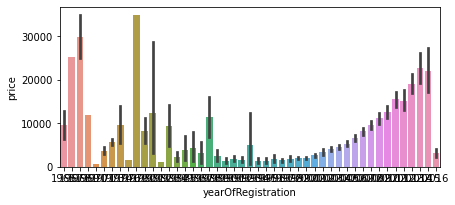

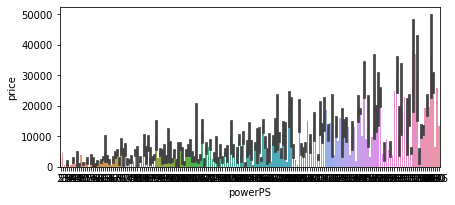

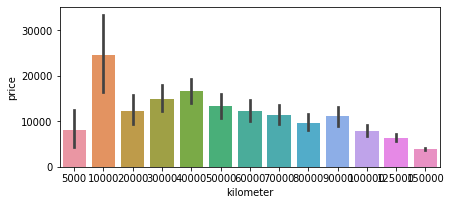

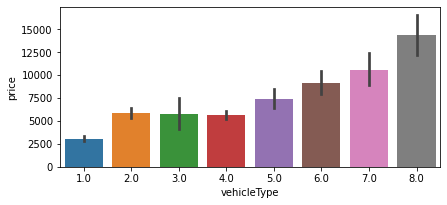

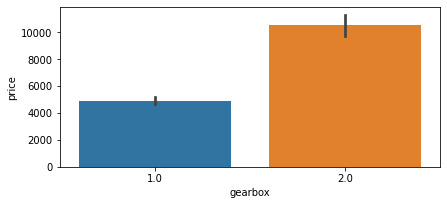

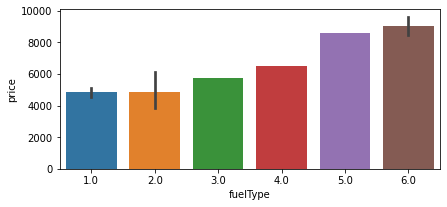

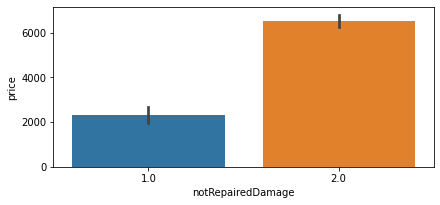

In [47]:
plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'yearOfRegistration', y = 'price', data = df)

plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'powerPS', y = 'price', data = df)

plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'kilometer', y = 'price', data = df)

plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'vehicleType', y = 'price', data = df)

plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'gearbox', y = 'price', data = df)

plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'fuelType', y = 'price', data = df)

plt.subplots(figsize=(15,10))
plt.subplot(322)
sns.barplot(x = 'notRepairedDamage', y = 'price', data = df)

### Correlation after filling the missing values and appliying laber encoder¶

In [48]:
df.corr()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,notRepairedDamage
price,1.000000,0.335728,0.467205,0.329326,0.566092,-0.479364,0.274937,0.165213
vehicleType,0.335728,1.000000,0.006265,0.157965,0.407713,-0.051141,0.077382,0.054117
yearOfRegistration,0.467205,0.006265,1.000000,0.091571,0.155394,-0.360817,0.283455,0.087329
gearbox,0.329326,0.157965,0.091571,1.000000,0.460782,-0.031604,0.170182,0.042760
powerPS,0.566092,0.407713,0.155394,0.460782,1.000000,0.015507,0.183454,0.048682
kilometer,-0.479364,-0.051141,-0.360817,-0.031604,0.015507,1.000000,0.080740,-0.103931
fuelType,0.274937,0.077382,0.283455,0.170182,0.183454,0.080740,1.000000,0.050624
notRepairedDamage,0.165213,0.054117,0.087329,0.042760,0.048682,-0.103931,0.050624,1.000000


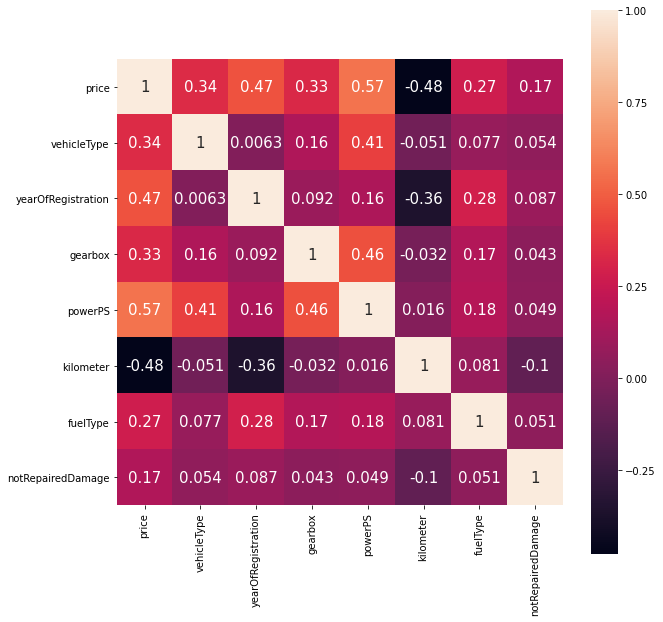

In [49]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, square=True, annot_kws={'fontsize':15})
plt.show()

In [50]:
df.sample(20)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
230,1450,1.0,1999,1.0,75,2_reihe,150000,1.0,peugeot,2.0
2650,11500,3.0,2010,1.0,102,transporter,90000,6.0,volkswagen,2.0
386,1350,1.0,2005,1.0,52,matiz,150000,1.0,chevrolet,1.0
1095,1200,5.0,2000,1.0,107,scenic,150000,1.0,renault,2.0
2807,36500,8.0,2011,2.0,258,x_reihe,70000,6.0,bmw,2.0
878,3500,6.0,2005,1.0,109,2_reihe,150000,1.0,peugeot,2.0
1499,350,2.0,1997,1.0,116,mondeo,20000,1.0,ford,2.0
53,7999,4.0,2008,2.0,143,3er,150000,6.0,bmw,2.0
257,6799,4.0,2002,2.0,286,5er,150000,2.0,bmw,2.0
1519,1550,4.0,1998,1.0,116,astra,150000,1.0,opel,2.0


### The useful features for our model are vehicle type, not repaired damage, fuel type, kilometer, power ps, gearbox, year of registration according to all the graphs above because they are positively or negatively correlated with the price.

## Machine learning

### Linear Regression

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [52]:
X=df['powerPS'].values[:,np.newaxis]
y=df['price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=30)
model1=LinearRegression()
model1.fit(X_train, y_train)
predicted=model1.predict(X_test)
print("MSE :",metrics.mean_squared_error(y_test,predicted))
print("R squared :",metrics.r2_score(y_test,predicted))

MSE : 28312885.6103959
R squared : 0.32360321189065777


<function matplotlib.pyplot.show(*args, **kw)>

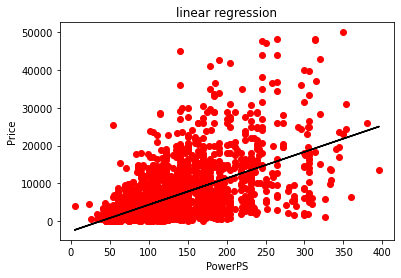

In [53]:
plt.scatter(X,y, color='r')
plt.title("linear regression")
plt.ylabel("Price")
plt.xlabel("PowerPS")
plt.plot(X,model1.predict(X),color='k')
plt.show

### Multilinear Regression

In [54]:
X=df[['yearOfRegistration','powerPS','kilometer']]
y=df['price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=30)
model=LinearRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)
print("MSE :",metrics.mean_squared_error(y_test,predicted))
print("R squared :",metrics.r2_score(y_test,predicted))

MSE : 14831393.310549404
R squared : 0.645676991865552


### Polynomial Regression

In [55]:
X=df[['yearOfRegistration','powerPS','kilometer','vehicleType','gearbox']]
y=df['price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=30)
model=LinearRegression()
poly=PolynomialFeatures(degree=3)
X_train_fit=poly.fit_transform(X_train)
model.fit(X_train_fit, y_train)
X_test=poly.fit_transform(X_test)
predicted=model.predict(X_test)
print("MSE :",metrics.mean_squared_error(y_test,predicted))
print("R squared :",metrics.r2_score(y_test,predicted))

MSE : 10450094.246930895
R squared : 0.7503465283853441


### The most accurate one is Polynomial regression with the highest MSE and R squared.

### Agglomerative Clustering

In [56]:
from sklearn.cluster import AgglomerativeClustering

In [57]:
df = df.drop(['brand'], axis=1)
df = df.drop(['model'], axis=1)

In [58]:
X=df[['yearOfRegistration','powerPS','kilometer','vehicleType','gearbox']]
y=df['price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=30)

In [59]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
clust_labels = model.fit_predict(df)

In [60]:
agglomerative = pd.DataFrame(clust_labels)
agglomerative

,0
0,2
1,2
2,2
3,1
4,2
...,...
2463,3
2464,2
2465,2
2466,3


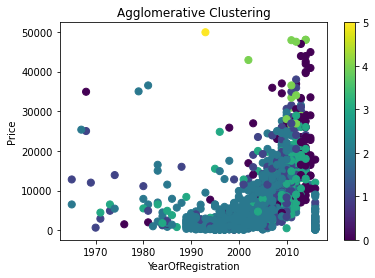

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['yearOfRegistration'], df['price'],c= agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('YearOfRegistration')
ax.set_ylabel('Price')
plt.colorbar(scatter)

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))

### Kmeans Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=0)
y_kmeans=kmeans.fit_predict(df)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['yearOfRegistration'], df['price'],c=y_kmeans,s=50)
ax.set_title('KMeans Clustering')
ax.set_xlabel('YearOfRegistration')
ax.set_ylabel('Price')
plt.colorbar(scatter)

In [ ]:
cost =[] 
for i in range(1, 15): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(df)  
    cost.append(KM.inertia_)      

In [ ]:
plt.plot(range(1, 15), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

#### The optimal value of K is 2

In [ ]:
kmeans=KMeans(n_clusters=2,random_state=0)
y_kmeans=kmeans.fit_predict(df)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['yearOfRegistration'], df['price'],c=y_kmeans,s=50)
ax.set_title('KMeans Clustering')
ax.set_xlabel('YearOfRegistration')
ax.set_ylabel('Price')
plt.colorbar(scatter)

# Thanks for your attention